# Classification of Handwritten Numbers

The data is from the MNIST Dataset

The application uses TensorFlow 2.0

In [1]:
#!pip install tensorflow
#!pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.keras import layers
import numpy as np
print(tf.__version__)

2.0.0


In [3]:
#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

8


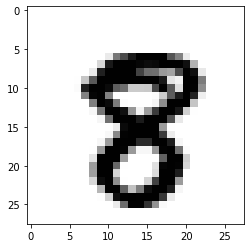

In [5]:
image_index = 23456 # You may select anything up to 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [13]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(10,activation=tf.nn.softmax))
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.5747 - accuracy: 0.8311
Epoch 2/10
60000/60000 [==============================] - 32s 539us/sample - loss: 0.2205 - accuracy: 0.9344
Epoch 3/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.1606 - accuracy: 0.9520
Epoch 4/10
60000/60000 [==============================] - 29s 476us/sample - loss: 0.1318 - accuracy: 0.9603
Epoch 5/10
60000/60000 [==============================] - 27s 446us/sample - loss: 0.1123 - accuracy: 0.9659
Epoch 6/10
60000/60000 [==============================] - 29s 487us/sample - loss: 0.0991 - accuracy: 0.9692
Epoch 7/10
60000/60000 [==============================] - 27s 451us/sample - loss: 0.0895 - accuracy: 0.9724
Epoch 8/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.0830 - accuracy: 0.9743
Epoch 9/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.0763 - accuracy: 0.9

In [17]:
model.evaluate(x_test, y_test, verbose=0)

[0.06860782409294043, 0.9784]

9


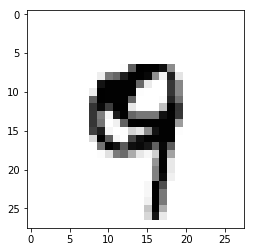

In [34]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [18]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2940 - accuracy: 0.9145
Epoch 2/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1443 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1072 - accuracy: 0.9680
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0887 - accuracy: 0.9725
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0737 - accuracy: 0.9765


[0.07737928656362929, 0.9764]